In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/Voice Recognition//')

import os 


In [0]:
ls

drive/  sample_data/


In [0]:
# os.chdir('/drive/My Drive/Colab Notebooks/Voice Recognition/')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [0]:
data = pd.read_csv('./data.csv')
data.head(3)

,Files,labels,Frequency,Audio_length,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,22050.0,1.70,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,22050.0,1.79,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,22050.0,2.62,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
Files               582 non-null object
labels              582 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 63.7+ KB


In [0]:
data = data.dropna()

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 581
Data columns (total 14 columns):
Files               556 non-null object
labels              556 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 65.2+ KB


In [0]:
data2 = data.drop(['Audio_length','Frequency'],axis=1)
data2.head(3)

,Files,labels,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [0]:
# load 
import librosa
import librosa.display
sampledata, sampling_rate = librosa.load('../Voice Recognition/Files/Copy of PTT-20190716-WA0065.wav', sr=44100 )
from IPython.display import Audio
Audio(data=sampledata, rate=sampling_rate)

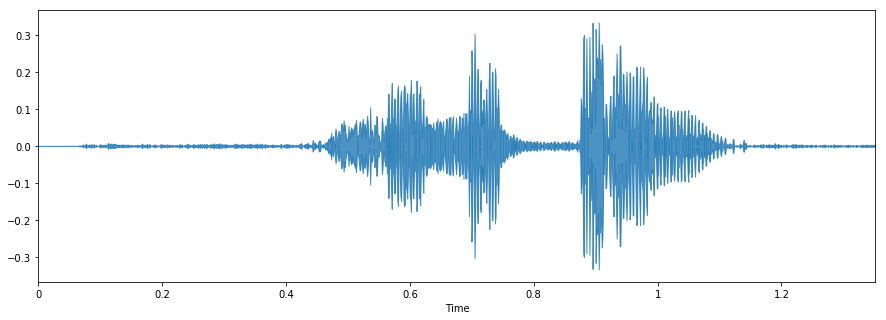

In [0]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(sampledata,sampling_rate,alpha=0.8)

In [0]:
X = data2.iloc[:,2:]



In [0]:
Y = data2.labels

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)


In [0]:
x.shape

(556, 10)

In [0]:
x_reshpe = x.reshape(556,10,1)

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [0]:
y = ohe.fit_transform(np.array(Y).reshape(-1,1)).toarray()
y.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(556, 4)

In [0]:
from keras.layers import InputLayer, Conv2D, Dense, Flatten, MaxPool2D,Conv1D,MaxPool1D
from keras.models import Sequential



Using TensorFlow backend.


In [0]:
def cnn():
  model = Sequential()

  #model.add(InputLayer(input_shape=(556,10,1)))

  model.add(Conv1D(filters=50, kernel_size=3, activation='relu',input_shape=[10,1]))
  model.add(MaxPool1D(strides=2))
  model.add(Conv1D(filters=50, kernel_size=3, activation='relu'))
  model.add(MaxPool1D(strides=2))
  model.add(Flatten())
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=4, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_reshpe.shape

(556, 10, 1)

In [0]:
from tensorflow.keras import regularizers

In [0]:
model = Sequential()

#model.add(InputLayer(input_shape=(556,10,1)))

model.add(Conv1D(filters=50, kernel_size=3, activation='relu',input_shape=[10,1],strides=1))
model.add(MaxPool1D(strides=2))
model.add(Conv1D(filters=50, kernel_size=3, activation='relu'))
model.add(MaxPool1D(strides=2))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_178 (Conv1D)          (None, 8, 50)             200       
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 4, 50)             0         
_________________________________________________________________
conv1d_179 (Conv1D)          (None, 2, 50)             7550      
_________________________________________________________________
max_pooling1d_75 (MaxPooling (None, 1, 50)             0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 404       
Total para

In [0]:
from tensorflow.keras import callbacks

In [0]:
class PrintDot(callbacks.Callback):
  def on_epoch_end(self,epoch,log):
    if epoch%10 == 0:
      print('')
      print('.',end='')

In [0]:
PrintDot()

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((444, 10), (444, 4), (112, 10), (112, 4))

In [0]:
np.savez('data.npz',x_train,x_test,y_train,y_test)

In [0]:
# reshape

x_train = x_train.reshape((444,10,1))
x_test = x_test.reshape((112,10,1))



In [0]:
np.savez('data_reshaped.npz',x_train,x_test,y_train,y_test)

In [0]:
result = model.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

In [0]:
df = pd.DataFrame(result.history)

In [0]:
df.head()

,val_loss,val_acc,loss,acc
0,1.280843,0.339286,1.328510,0.326577
1,1.243341,0.428571,1.199550,0.488739
2,1.210960,0.437500,1.117040,0.522523
3,1.175342,0.455357,1.069785,0.554054
4,1.137073,0.464286,1.035309,0.590090


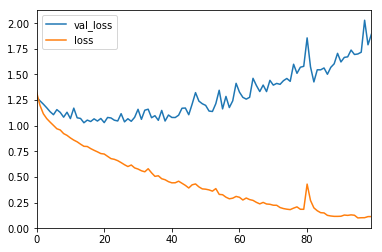

In [0]:
df[['val_loss','loss']].plot()

## Wth Regularization

In [0]:
model1 = Sequential()

#model.add(InputLayer(input_shape=(556,10,1)))

model1.add(Conv1D(filters=50, kernel_size=3, activation='relu',input_shape=[10,1],strides=1,kernel_regularizer=regularizers.l2(0.01)))
model1.add(MaxPool1D(strides=2))
model1.add(Conv1D(filters=50, kernel_size=3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model1.add(MaxPool1D(strides=2))
model1.add(Flatten())
model1.add(Dense(units=100, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dense(units=4, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
result1 = model1.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 2s 4ms/step - loss: 2.3752 - acc: 0.3446 - val_loss: 2.1767 - val_acc: 0.3214

.Epoch 2/100
444/444 [==============================] - 0s 224us/step - loss: 2.0082 - acc: 0.4257 - val_loss: 1.9132 - val_acc: 0.3482
Epoch 3/100
444/444 [==============================] - 0s 213us/step - loss: 1.7599 - acc: 0.4707 - val_loss: 1.7421 - val_acc: 0.3929
Epoch 4/100
444/444 [==============================] - 0s 213us/step - loss: 1.5787 - acc: 0.4910 - val_loss: 1.6650 - val_acc: 0.3661
Epoch 5/100
444/444 [==============================] - 0s 217us/step - loss: 1.4731 - acc: 0.5293 - val_loss: 1.5421 - val_acc: 0.3393
Epoch 6/100
444/444 [==============================] - 0s 235us/step - loss: 1.3949 - acc: 0.5045 - val_loss: 1.4959 - val_acc: 0.3214
Epoch 7/100
444/444 [==============================] - 0s 232us/step - loss: 1.3356 - acc: 0.5450 - val_loss: 1.4182 - val_acc: 0.4911
Epoch 8/1

In [0]:
reg_df = pd.DataFrame(result1.history)
reg_df.head()

,val_loss,val_acc,loss,acc
0,2.176702,0.321429,2.375151,0.344595
1,1.913192,0.348214,2.008231,0.425676
2,1.742126,0.392857,1.759870,0.470721
3,1.664954,0.366071,1.578735,0.490991
4,1.542126,0.339286,1.473072,0.529279


Text(0.5, 1.0, 'With Regularization L2')

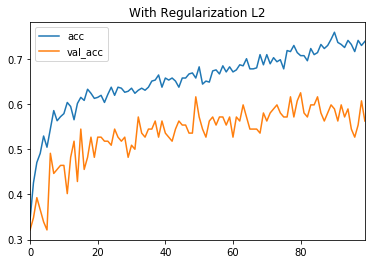

In [0]:
reg_df[['acc','val_acc']].plot()
plt.title('With Regularization L2')

Text(0.5, 1.0, 'With Regularization L2')

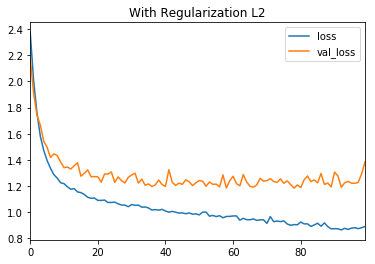

In [0]:
reg_df[['loss','val_loss']].plot()
plt.title('With Regularization L2')

<img src=https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6>

In [0]:
model2 = Sequential()

#model.add(InputLayer(input_shape=(556,10,1)))

model2.add(Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=[10,1],padding='SAME'))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='SAME'))
model2.add(MaxPool1D(strides=2))
# 5
                  
model2.add(Conv1D(filters=256,kernel_size=3, activation='relu',padding='SAME'))
model2.add(Conv1D(filters=256, kernel_size=3, activation='relu',padding='SAME'))
model2.add(MaxPool1D(strides=2))

           
model2.add(Flatten())
model2.add(Dense(units=4096, activation='relu'))
model2.add(Dense(units=4096, activation='relu'))
model2.add(Dense(units=4, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0821 09:07:39.441914 139773988116352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 09:07:39.480503 139773988116352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 09:07:39.487452 139773988116352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 09:07:39.536024 139773988116352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 09:07:39.616570 139773988116352 deprecation_wrapp

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 128)           512       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 256)            98560     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 5, 256)            196864    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [0]:
result2 = model2.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

W0821 09:07:53.668762 139773988116352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0821 09:07:53.791671 139773988116352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 8s 18ms/step - loss: 1.2574 - acc: 0.3919 - val_loss: 1.1711 - val_acc: 0.4286

.Epoch 2/100
444/444 [==============================] - 1s 1ms/step - loss: 1.1357 - acc: 0.5045 - val_loss: 1.1552 - val_acc: 0.4911
Epoch 3/100
444/444 [==============================] - 1s 1ms/step - loss: 1.0926 - acc: 0.5248 - val_loss: 1.1358 - val_acc: 0.4375
Epoch 4/100
444/444 [==============================] - 1s 1ms/step - loss: 1.0593 - acc: 0.5721 - val_loss: 1.1292 - val_acc: 0.5000
Epoch 5/100
444/444 [==============================] - 1s 1ms/step - loss: 0.9431 - acc: 0.6081 - val_loss: 1.0312 - val_acc: 0.4821
Epoch 6/100
444/444 [==============================] - 1s 1ms/step - loss: 0.9236 - acc: 0.6239 - val_loss: 1.1526 - val_acc: 0.4464
Epoch 7/100
444/444 [==============================] - 1s 1ms/step - loss: 0.8508 - acc: 0.6441 - val_loss: 0.9901 - val_acc: 0.5357
Epoch 8/100
444/444 

In [0]:
df3 = pd.DataFrame(result2.history)
df3.head()

,val_loss,val_acc,loss,acc
0,1.171145,0.428571,1.257399,0.391892
1,1.155166,0.491071,1.135711,0.504505
2,1.135755,0.437500,1.092567,0.524775
3,1.129182,0.500000,1.059297,0.572072
4,1.031224,0.482143,0.943135,0.608108


Text(0.5, 1.0, 'VGG Plot')

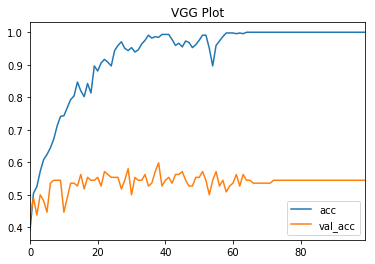

In [0]:
df3[['acc','val_acc']].plot()
plt.title('VGG Plot')

Text(0.5, 1.0, 'VGG Plot')

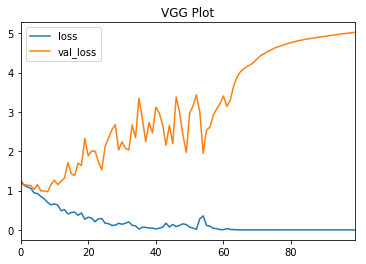

In [0]:
df3[['loss','val_loss']].plot()
plt.title('VGG Plot')

In [0]:
model3 = Sequential()

#model.add(InputLayer(input_shape=(556,10,1)))

model3.add(Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=[10,1],padding='SAME',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='SAME',kernel_regularizer=regularizers.l2(0.01)))
model3.add(MaxPool1D(strides=2))
# 5
                  
model3.add(Conv1D(filters=256,kernel_size=3, activation='relu',padding='SAME',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Conv1D(filters=256, kernel_size=3, activation='relu',padding='SAME',kernel_regularizer=regularizers.l2(0.01)))
model3.add(MaxPool1D(strides=2))

           
model3.add(Flatten())
model3.add(Dense(units=4096, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(units=4096, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(units=4, activation='softmax'))

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 10, 128)           512       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 128)           49280     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5, 256)            98560     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 5, 256)            196864    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

In [0]:
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
result3 = model3.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 2s 4ms/step - loss: 56.7338 - acc: 0.3784 - val_loss: 56.4065 - val_acc: 0.3929

.Epoch 2/100
444/444 [==============================] - 0s 803us/step - loss: 56.1119 - acc: 0.4122 - val_loss: 55.7889 - val_acc: 0.3929
Epoch 3/100
444/444 [==============================] - 0s 786us/step - loss: 55.4977 - acc: 0.3694 - val_loss: 55.1793 - val_acc: 0.4107
Epoch 4/100
444/444 [==============================] - 0s 784us/step - loss: 54.8906 - acc: 0.4234 - val_loss: 54.5767 - val_acc: 0.4107
Epoch 5/100
444/444 [==============================] - 0s 801us/step - loss: 54.2906 - acc: 0.4437 - val_loss: 53.9809 - val_acc: 0.3661
Epoch 6/100
444/444 [==============================] - 0s 803us/step - loss: 53.6969 - acc: 0.4144 - val_loss: 53.3919 - val_acc: 0.3661
Epoch 7/100
444/444 [==============================] - 0s 793us/step - loss: 53.1096 - acc: 0.4572 - val_loss: 52.8079 - val_acc: 0.

In [0]:
result3 = model3.fit(x=x_train,y=y_train,batch_size=16,epochs=1000,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/1000
444/444 [==============================] - 0s 908us/step - loss: 19.1971 - acc: 0.5586 - val_loss: 19.1987 - val_acc: 0.4643

.Epoch 2/1000
444/444 [==============================] - 0s 804us/step - loss: 18.9969 - acc: 0.5676 - val_loss: 18.9817 - val_acc: 0.5000
Epoch 3/1000
444/444 [==============================] - 0s 803us/step - loss: 18.7973 - acc: 0.5631 - val_loss: 18.7874 - val_acc: 0.4911
Epoch 4/1000
444/444 [==============================] - 0s 800us/step - loss: 18.6011 - acc: 0.5766 - val_loss: 18.5979 - val_acc: 0.4821
Epoch 5/1000
444/444 [==============================] - 0s 807us/step - loss: 18.4039 - acc: 0.5788 - val_loss: 18.3732 - val_acc: 0.5179
Epoch 6/1000
444/444 [==============================] - 0s 821us/step - loss: 18.2161 - acc: 0.5676 - val_loss: 18.2209 - val_acc: 0.4821
Epoch 7/1000
444/444 [==============================] - 0s 807us/step - loss: 18.0223 - acc: 0.5698 - val_loss: 17.9909 - va

In [0]:
df4 = pd.DataFrame(result3.history)
df4.head()

,val_loss,val_acc,loss,acc
0,19.198733,0.464286,19.197096,0.558559
1,18.981714,0.500000,18.996933,0.567568
2,18.787401,0.491071,18.797349,0.563063
3,18.597918,0.482143,18.601149,0.576577
4,18.373196,0.517857,18.403916,0.578829


Text(0.5, 1.0, 'VGG Plot')

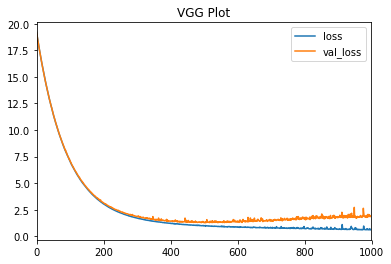

In [0]:
df4[['loss','val_loss']].plot()
plt.title('VGG Plot')

In [0]:
def listen(x):
    r=rs.Recognizer()
    if x == 0:
        system('say Hi. How can I help?')
    with rs.Microphone() as source:
        audio=r.listen(source)
    try:
        text = r.recognize_google(audio)
        y = process(text.lower())
        return(y)
    except:
        if x == 1:
            system('say Good Bye!')
        else:
            system('say I did not get that. Please say again.')
            listen(1)